# Advanced House Price Prediction

###### Pavan Pyla
###### 22232

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("train.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
column_names = list(df.columns)
null_column_indices = []
for i in range(0,len(column_names)):
    if(df[column_names[i]].isnull().values.any() == True):               # checking the columns containg null values
        null_column_indices.append(column_names[i])
null_column_indices 

numeric_cols = df[null_column_indices].select_dtypes(include='number')


<AxesSubplot:xlabel='LotFrontage'>

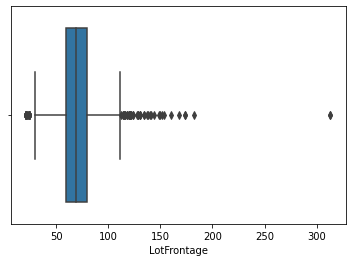

In [5]:
import seaborn as sns


sns.boxplot(x=df['LotFrontage'])                      # Checking for the Outliers

<AxesSubplot:xlabel='MasVnrArea'>

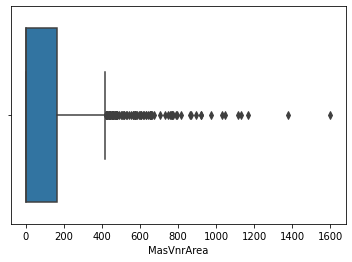

In [6]:

sns.boxplot(x=df['MasVnrArea'])                                # Checking for the Outliers

<AxesSubplot:xlabel='GarageYrBlt'>

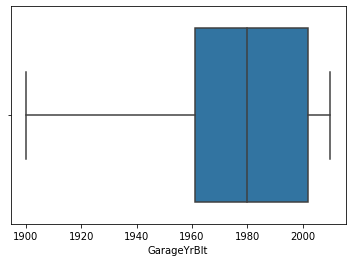

In [7]:

sns.boxplot(x=df['GarageYrBlt'])                        # Checking for the Outliers

In [8]:
mode_value = df['LotFrontage'].mode()[0]
df['LotFrontage'].fillna(mode_value, inplace=True)


In [9]:
mode_value = df['MasVnrArea'].mode()[0]
df['MasVnrArea'].fillna(mode_value, inplace=True)

In [10]:

mode_value = df['GarageYrBlt'].mode()[0]
df['GarageYrBlt'].fillna(mode_value, inplace=True)

In [11]:

# apply logarithmic transformation to column B
df['MasVnrArea'] = np.log(df['MasVnrArea'])

C:\Users\Msc 1\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
count = 0
for i in range(0,len(df['MasVnrArea'])):
    if(df['MasVnrArea'][i]== float('-inf')):
        count+=1
count    
     

869

In [13]:

# Replacing -inf with 0
df['MasVnrArea'] = df['MasVnrArea'].replace(-np.inf, 0)

In [14]:

df['MasVnrArea']

0       5.278115
1       0.000000
2       5.087596
3       0.000000
4       5.857933
          ...   
1455    0.000000
1456    4.779123
1457    0.000000
1458    0.000000
1459    0.000000
Name: MasVnrArea, Length: 1460, dtype: float64

<AxesSubplot:xlabel='MasVnrArea'>

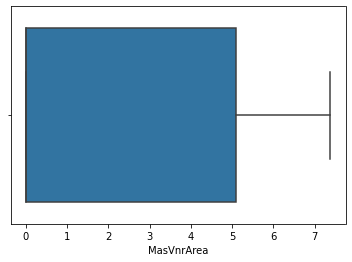

In [15]:
sns.boxplot(x=df['MasVnrArea'])

<AxesSubplot:xlabel='LotFrontage'>

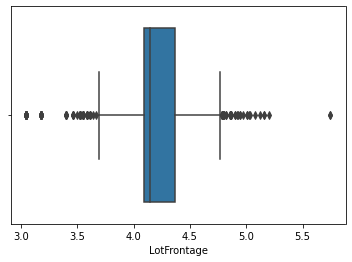

In [16]:
# apply logarithmic transformation to column B
df['LotFrontage'] = np.log(df['LotFrontage'])
count = 0
for i in range(0,len(df['LotFrontage'])):
    if(df['LotFrontage'][i]== float('-inf')):
        count+=1
count  
df['LotFrontage'] = df['LotFrontage'].replace(-np.inf, 0)
sns.boxplot(x=df['LotFrontage'])

<AxesSubplot:xlabel='GarageYrBlt'>

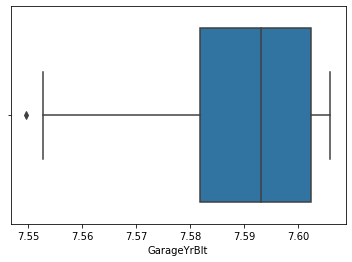

In [17]:
# apply logarithmic transformation to column B
df['GarageYrBlt'] = np.log(df['GarageYrBlt'])
count = 0
for i in range(0,len(df['GarageYrBlt'])):
    if(df['GarageYrBlt'][i]== float('-inf')):
        count+=1
count  
df['GarageYrBlt'] = df['GarageYrBlt'].replace(-np.inf, 0)
sns.boxplot(x=df['GarageYrBlt'])

## Now we Have eliminated the missing as well as ouliers in Numeric Columns


In [18]:

q1 = df['GarageYrBlt'].quantile(0.25)
q3 = df['GarageYrBlt'].quantile(0.75)
iqr = q3 - q1

# calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# count the number of outliers
num_outliers = ((df['GarageYrBlt'] < lower_bound) | (df['GarageYrBlt'] > upper_bound)).sum()

# print the number of outliers
print("Number of outliers in column 'GarageYrBlt':", num_outliers)

Number of outliers in column 'GarageYrBlt': 1


In [19]:

null_cat_cols = [i for i in null_column_indices if i not in numeric_cols]

In [20]:
for i in range(0,len(null_cat_cols)):
    df[null_cat_cols[i]].fillna(df[null_cat_cols[i]].mode()[0], inplace=True)
     

In [21]:
df.isna().any()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

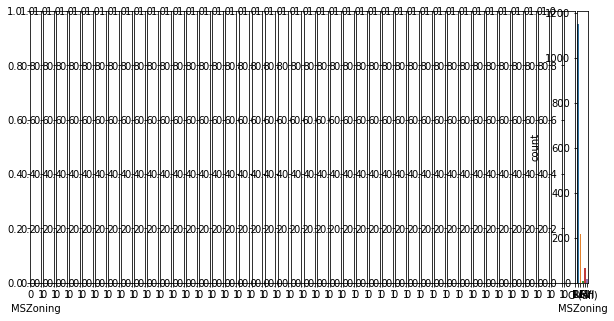

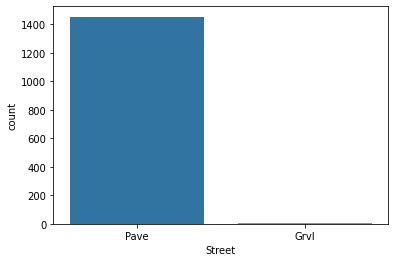

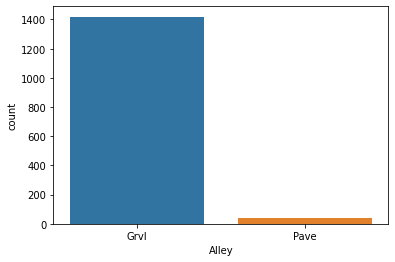

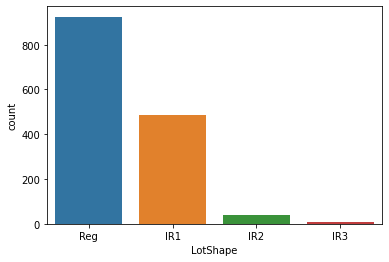

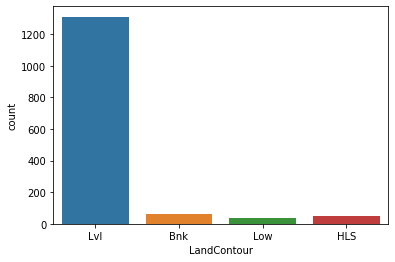

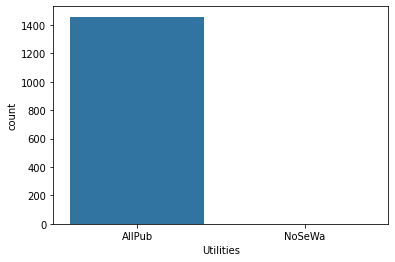

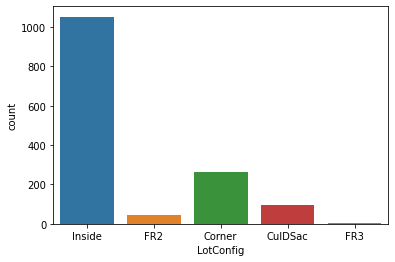

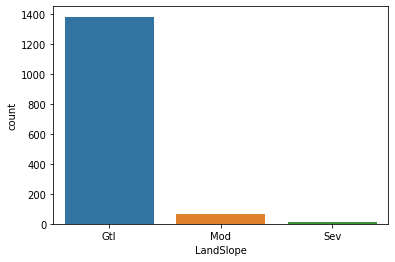

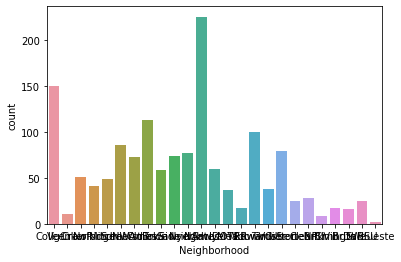

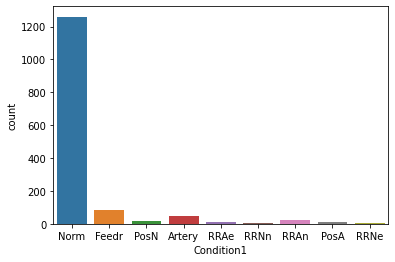

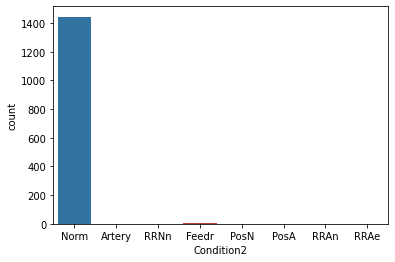

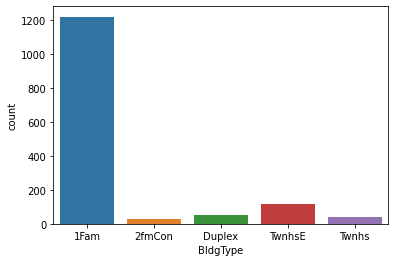

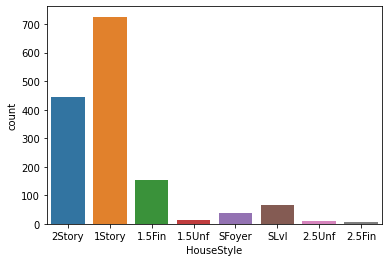

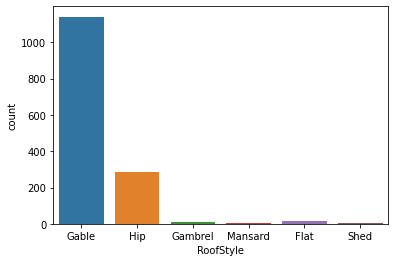

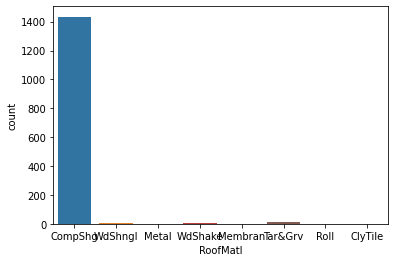

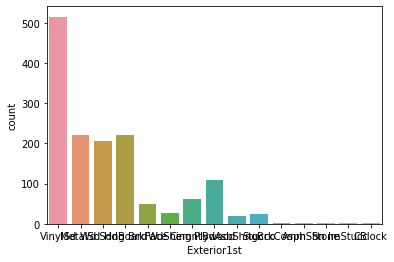

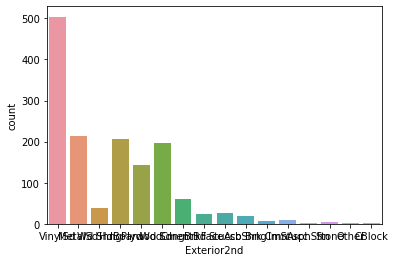

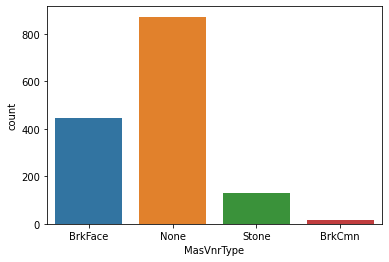

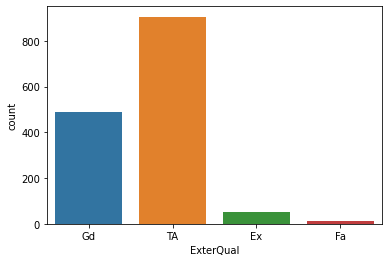

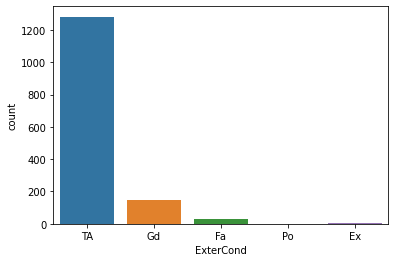

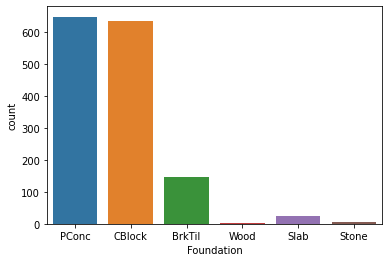

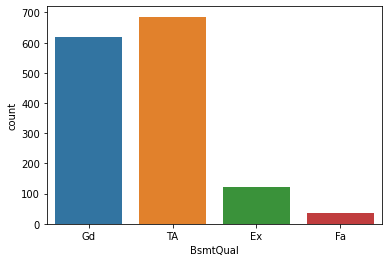

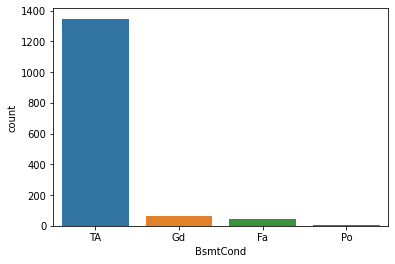

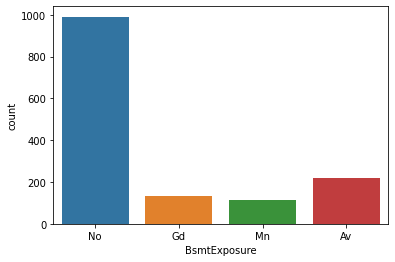

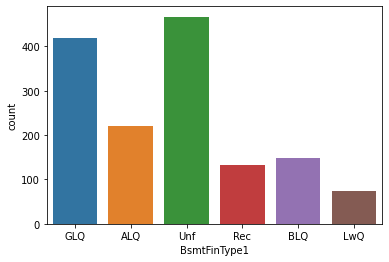

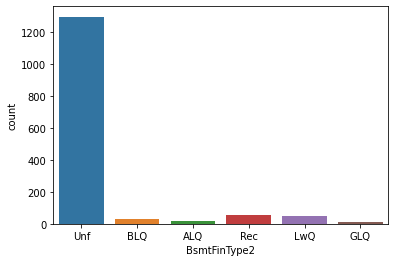

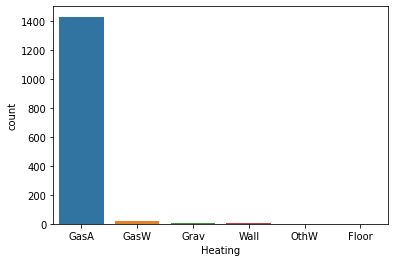

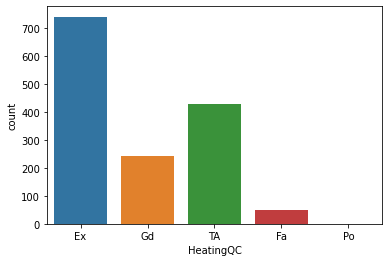

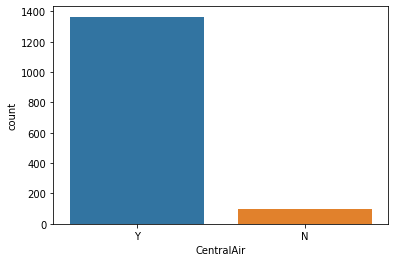

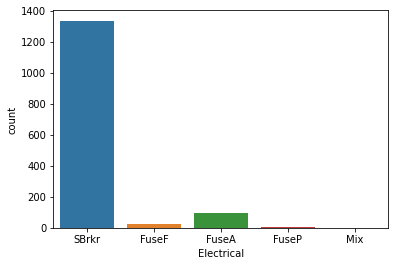

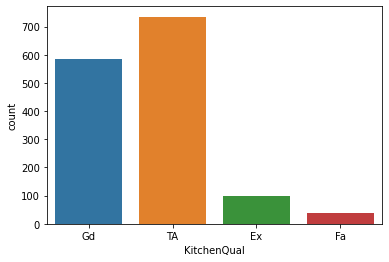

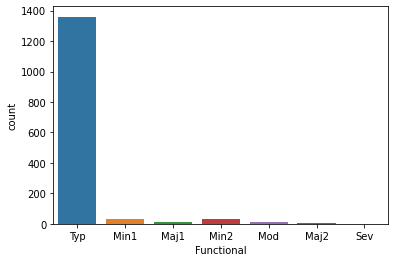

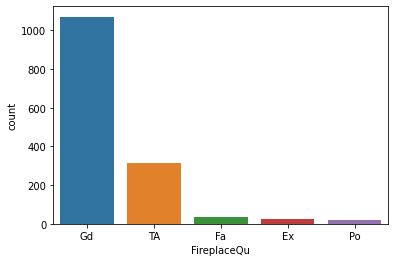

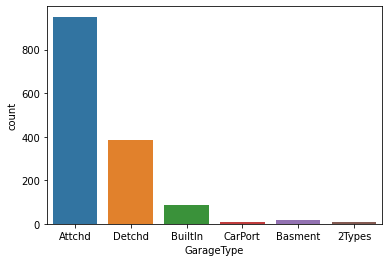

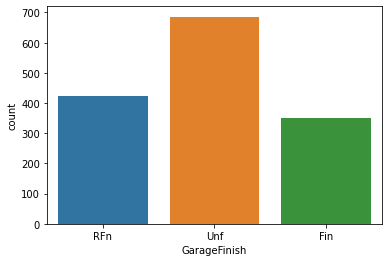

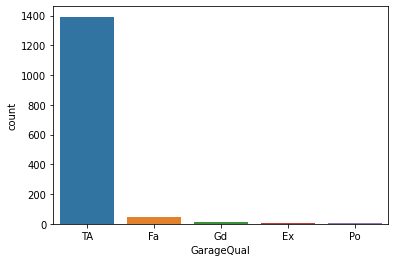

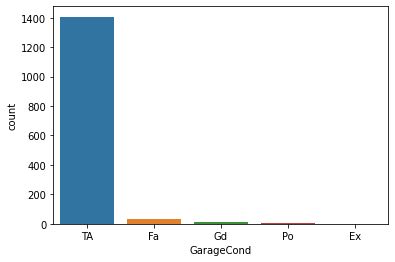

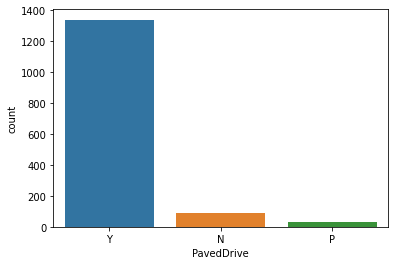

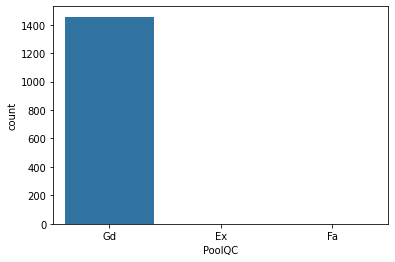

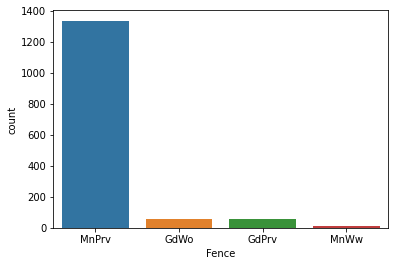

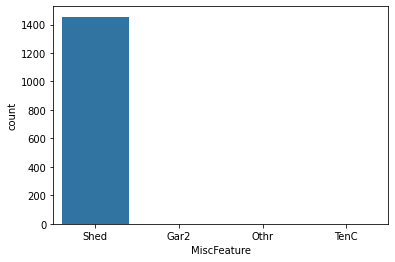

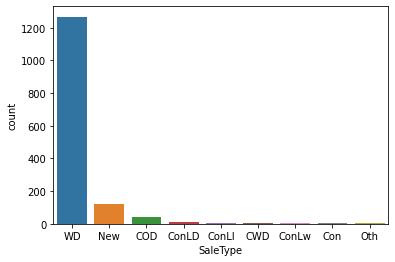

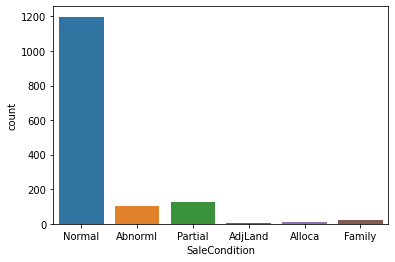

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# create subplots
fig, axs = plt.subplots(1, len(cat_cols), figsize=(10, 5))

# loop over columns and create bar plots
for i, col in enumerate(cat_cols):
    sns.countplot(x=cat_cols[i], data=df)
    axs[i].set_xlabel(col)
    plt.show()

### Labeling the Columns

In [23]:
cols_to_label = []
cols_to_onehot = []

for i in range(0, len(cat_cols)):
    if(df[cat_cols[i]].nunique()<=6):
        cols_to_label.append(cat_cols[i])
    else:
        cols_to_onehot.append(cat_cols[i]) 

from sklearn import preprocessing
#make an instance of Label Encoder
for i in range(0, len(cols_to_label)):
    C = cols_to_label[i]
    label_encoder = preprocessing.LabelEncoder()                            #importing Scikit learn Label Encoders
    df[C] = label_encoder.fit_transform(df[C])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,WD,4,208500
1,2,20,3,4.382027,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,WD,4,181500
2,3,60,3,4.219508,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,WD,4,223500
3,4,70,3,4.094345,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,WD,0,140000
4,5,60,3,4.430817,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,WD,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.127134,7917,1,0,3,3,0,...,0,2,2,2,0,8,2007,WD,4,175000
1456,1457,20,3,4.442651,13175,1,0,3,3,0,...,0,2,2,2,0,2,2010,WD,4,210000
1457,1458,70,3,4.189655,9042,1,0,3,3,0,...,0,2,0,2,2500,5,2010,WD,4,266500
1458,1459,20,3,4.219508,9717,1,0,3,3,0,...,0,2,2,2,0,4,2010,WD,4,142125


### Encoding the Columns

In [24]:
# apply one hot encoding to columns
df_encoded = pd.get_dummies(df, columns=['Neighborhood','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','Functional','SaleType'])

# display the encoded dataframe
print(df_encoded)


        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3     4.174387     8450       1      0   
1        2          20         3     4.382027     9600       1      0   
2        3          60         3     4.219508    11250       1      0   
3        4          70         3     4.094345     9550       1      0   
4        5          60         3     4.430817    14260       1      0   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3     4.127134     7917       1      0   
1456  1457          20         3     4.442651    13175       1      0   
1457  1458          70         3     4.189655     9042       1      0   
1458  1459          20         3     4.219508     9717       1      0   
1459  1460          20         3     4.317488     9937       1      0   

      LotShape  LandContour  Utilities  ...  Functional_Typ  SaleType_COD  \
0            3            3          0  ...   

In [25]:

copy_df = df

In [26]:

result = [x for x in list(copy_df.columns) if x not in list(df_encoded.columns)]
print(result)

['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType']


In [27]:
df.drop(['SaleType'],axis=1)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,WD,4,208500
1,2,20,3,4.382027,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,WD,4,181500
2,3,60,3,4.219508,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,WD,4,223500
3,4,70,3,4.094345,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,WD,0,140000
4,5,60,3,4.430817,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,WD,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.127134,7917,1,0,3,3,0,...,0,2,2,2,0,8,2007,WD,4,175000
1456,1457,20,3,4.442651,13175,1,0,3,3,0,...,0,2,2,2,0,2,2010,WD,4,210000
1457,1458,70,3,4.189655,9042,1,0,3,3,0,...,0,2,0,2,2500,5,2010,WD,4,266500
1458,1459,20,3,4.219508,9717,1,0,3,3,0,...,0,2,2,2,0,4,2010,WD,4,142125


In [28]:
p = df_encoded
p.head(5)
     

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Functional_Typ,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,3,4.174387,8450,1,0,3,3,0,...,1,0,0,0,0,0,0,0,0,1
1,2,20,3,4.382027,9600,1,0,3,3,0,...,1,0,0,0,0,0,0,0,0,1
2,3,60,3,4.219508,11250,1,0,0,3,0,...,1,0,0,0,0,0,0,0,0,1
3,4,70,3,4.094345,9550,1,0,0,3,0,...,1,0,0,0,0,0,0,0,0,1
4,5,60,3,4.430817,14260,1,0,0,3,0,...,1,0,0,0,0,0,0,0,0,1


In [29]:
X = p.iloc[:, 4].values
y = p.iloc[:, -1].values

In [30]:

X.reshape(-1, 1)
y.reshape(-1, 1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

# Linear Regression

In [31]:
from sklearn.model_selection import train_test_split

X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size = 1/3, random_state = 0)

Estimated coefficients:
b_0 = 0.8751713803048097            
b_1 = -5.2350460824469005e-08


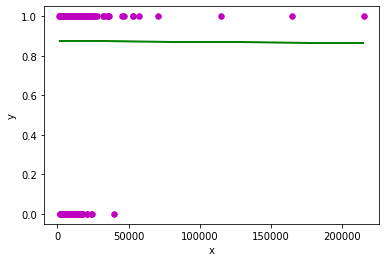

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Code Taken from Geeks_for_Geeks
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
    
def main(a,b):
    # observations / data
    x = a
    y = b
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
if __name__ == "__main__":
    main(X_trainm,y_trainm)

In [33]:
X = p.iloc[:, 13].values
y = p.iloc[:, -1].values

In [34]:
X.reshape(-1, 1)
y.reshape(-1, 1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)

In [35]:

# Train test split

X_trainm, X_testm, y_trainm, y_testm = train_test_split(X, y, test_size = .1, random_state = 0)

Estimated coefficients:
b_0 = 1.213049863904259            
b_1 = -0.05608220381031991


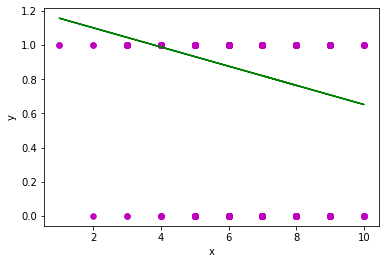

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Code Taken from Geeks_for_Geeks
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
def main(a,b):
    # observations / data
    x = a
    y = b
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
if __name__ == "__main__":
    main(X_trainm,y_trainm)
     

In [37]:
b0,b1 = estimate_coef(X_trainm,y_trainm)

In [38]:
def yhat(x):
    return b0 + x*b1

y_predm = yhat(X_testm)
y_predm
     

array([0.87655664, 0.87655664, 0.93263884, 0.82047444, 0.87655664,
       0.93263884, 0.76439223, 0.87655664, 0.65222783, 0.82047444,
       0.82047444, 0.93263884, 0.82047444, 0.93263884, 0.87655664,
       0.93263884, 0.82047444, 0.98872105, 0.93263884, 0.82047444,
       0.93263884, 0.87655664, 0.93263884, 0.87655664, 0.87655664,
       0.76439223, 0.87655664, 0.98872105, 0.70831003, 0.93263884,
       0.93263884, 0.82047444, 0.87655664, 0.76439223, 0.76439223,
       0.82047444, 0.70831003, 0.93263884, 0.82047444, 0.76439223,
       0.87655664, 0.93263884, 0.82047444, 0.76439223, 0.76439223,
       0.93263884, 0.93263884, 0.93263884, 0.87655664, 0.98872105,
       0.70831003, 0.93263884, 0.87655664, 0.98872105, 0.82047444,
       0.98872105, 0.93263884, 0.76439223, 0.93263884, 0.93263884,
       0.87655664, 0.93263884, 0.93263884, 0.93263884, 0.87655664,
       0.87655664, 0.93263884, 0.82047444, 0.93263884, 0.82047444,
       0.82047444, 0.93263884, 1.04480325, 0.76439223, 0.98872

# Multiple Linear Regression

In [39]:

X = p.iloc[:, 1:-1].values
y = p.iloc[:, -1].values

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
     

LinearRegression()

In [42]:
y_pred = regressor.predict(X_test)
y_pred
     

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  6.87783164e-13,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -3.51607632e-12,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.31039624e-12,  2.47601939e-12,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  5.62994096e-13,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -7.77156117e-13,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  

In [43]:
from sklearn import metrics
print(f"Mean Absoulute : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of MSE
print(f"Mean Squared : {metrics.mean_squared_error(y_test,y_pred)}")

  # Print result of RMSE
print(f"Root Mean Square: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

Mean Absoulute : 1.4315623749170584e-12
Mean Squared : 3.643704304078952e-24
Root Mean Square: 1.9088489474232767e-12
R2 score is: 1.0


# Polynomial Regression

In [44]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load your dataset and split into X (independent variables) and y (dependent variable)
X = p.iloc[:, 1:-1].values
y =p.iloc[:, -1].values

# Fit polynomial regression model
poly = PolynomialFeatures(degree=1) # set degree of polynomial
X_poly = poly.fit_transform(X) # create polynomial features
poly_reg = LinearRegression() # create linear regression model
poly_reg.fit(X_poly, y) # fit model on polynomial features

# Make predictions
y_pred = poly_reg.predict(X_poly)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"Regression Mean Squared Errror: {rmse}")
print(f"R Squared score: {r2}")

Regression Mean Squared Errror: 1.2697877184416361e-11
R Squared score: 1.0
